# Segmentación de triángulos

### Alumna: Salma Patricia Gutiérrez Rivera

#### Realice los cálculos para la imagen triangulos2.jpg. Haga una función que calcule cuantos triángulos aparecen en la figura. Haga una imagen para cada triángulo encontrado.

__1.__ Segmentar las aristas de los triángulos. En los resultados, mostrar la imagen binaria de las aristas.

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import math
import skimage
from skimage.measure import label, regionprops
from skimage.color import label2rgb
from itertools import combinations

In [2]:
triangulos = cv.imread("images/triangulos2.jpg", 0)

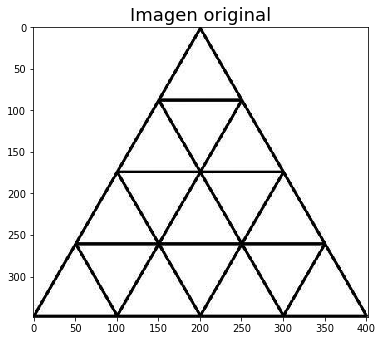

In [3]:
fig = plt.figure(figsize = (6, 6))
fig.add_subplot(1, 1, 1)
plt.imshow(triangulos, cmap = 'gray');
plt.title("Imagen original", size = 18);

In [4]:
bin_triang = np.where(triangulos < 170, 255, 0)

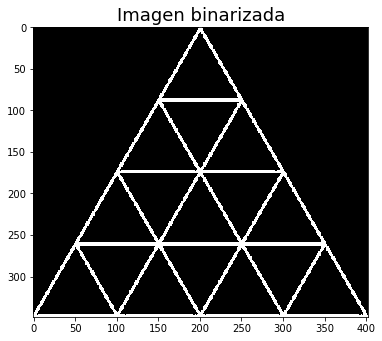

In [5]:
fig = plt.figure(figsize = (6, 6))
fig.add_subplot(1, 1, 1)
plt.imshow(bin_triang, cmap = 'gray');
plt.title("Imagen binarizada", size = 18);

In [6]:
padd_bin_triang = cv.copyMakeBorder(bin_triang, 10, 10, 10, 10, cv.BORDER_CONSTANT)
imgu8 = np.uint8(padd_bin_triang)
kernel3 = np.ones((3, 3), np.uint8)
contor = cv.erode(imgu8, kernel3, iterations = 1)

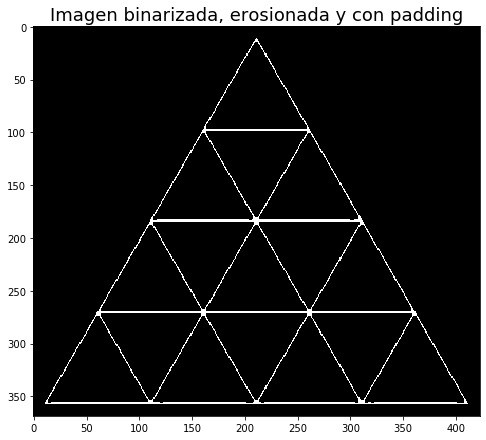

In [7]:
fig = plt.figure(figsize = (8, 8))
fig.add_subplot(1, 1, 1)
plt.imshow(contor, cmap = 'gray');
plt.title("Imagen binarizada, erosionada y con padding", size = 18);

__2.__ Encontrar los modelos de las rectas que forman cada arista. Para esto, solicite un umbral que elimine a las posibles aristas de longitud menor a dicho umbral. Los parámetros que debe encontrar de cada arista son $\theta$, $\rho$ y longitud. Hacer una tabla donde cada renglón sea una arista (identifíquelas con un número) y las columnas sean los parámetros indicados.

In [8]:
img_con_lineasp = cv.cvtColor(contor, cv.COLOR_GRAY2BGR)
lineas_p = cv.HoughLinesP(contor, 1, np.pi / 180, 45, None, 50, 7)
font = cv.FONT_HERSHEY_SIMPLEX 
fontScale = 0.5
color = (255, 0, 0) 
thickness = 1

for i in range(len(lineas_p)):
    l = lineas_p[i][0]
    cv.line(img_con_lineasp, (l[0], l[1]), (l[2], l[3]), (0,0,255), 1, cv.LINE_AA)
    org = ((l[0] + l[2]) // 2, (l[1] + l[3]) // 2)
    img_con_lineasp = cv.putText(img_con_lineasp, str(i), org, font, fontScale, color, thickness, cv.LINE_AA)

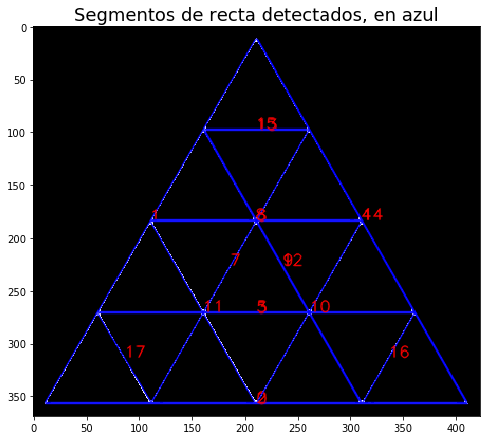

In [9]:
fig = plt.figure(figsize = (8, 8))
fig.add_subplot(1, 1, 1)
plt.imshow(img_con_lineasp);
plt.title("Segmentos de recta detectados, en azul", size = 18);

In [10]:
print("Se detectaron", lineas_p.shape[0], "segmentos de recta")

Se detectaron 18 segmentos de recta


Dibujando recta por recta, encuentro que 0, 5, 8, 9, 13 y 14 son redundantes. Corrijo a mano.

In [11]:
lineas_p = np.delete(lineas_p, 14, 0);
lineas_p = np.delete(lineas_p, 13, 0);
lineas_p = np.delete(lineas_p, 9, 0);
lineas_p = np.delete(lineas_p, 8, 0);
lineas_p = np.delete(lineas_p, 5, 0);
lineas_p = np.delete(lineas_p, 0, 0);

In [12]:
def obtener_houghparams(puntos):
    x1 = puntos[0]
    y1 = puntos[1]
    x2 = puntos[2]
    y2 = puntos[3]
    
    theta = math.atan((x1 - x2) / (y2 - y1))
    rho = x1 * math.cos(theta) + y1 * math.sin(theta)
    longitud = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    
    return [round(theta * 180.0 / math.pi), round(rho), round(longitud)]

In [13]:
img_con_lineasp = cv.cvtColor(contor, cv.COLOR_GRAY2BGR)
hough_params = []

for i in range(len(lineas_p)):
    l = lineas_p[i][0]
    cv.line(img_con_lineasp, (l[0], l[1]), (l[2], l[3]), (0,0,255), 1, cv.LINE_AA)
    params = obtener_houghparams(l)
    hough_params.append(params)
    org = ((l[0] + l[2]) // 2, (l[1] + l[3]) // 2)
    img_con_lineasp = cv.putText(img_con_lineasp, str(i), org, font, fontScale, color, thickness, cv.LINE_AA)

c:\users\rafa\miniconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in int_scalars
  import sys


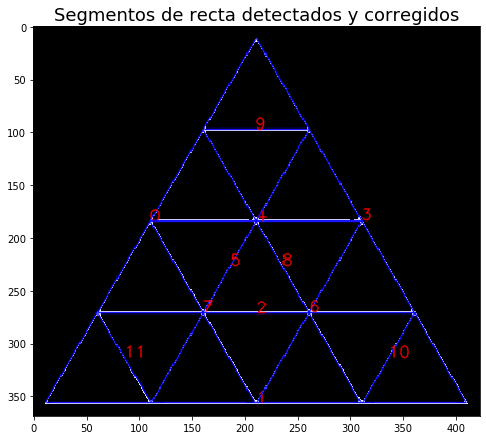

In [14]:
fig = plt.figure(figsize = (8, 8))
fig.add_subplot(1, 1, 1)
plt.imshow(img_con_lineasp);
plt.title("Segmentos de recta detectados y corregidos", size = 18);

In [15]:
print("segmento   theta    rho      longitud")

for i in range(len(hough_params)):
    set_ = hough_params[i]
    print(i, "\t  ", set_[0], "\t   ", set_[1], "\t", set_[2])

segmento   theta    rho      longitud
0 	   30 	    188.0 	 397
1 	   -90 	    -356.0 	 398
2 	   -90 	    -271.0 	 300
3 	   -30 	    177.0 	 397
4 	   -90 	    -184.0 	 200
5 	   30 	    275.0 	 298
6 	   30 	    361.0 	 196
7 	   -30 	    4.0 	 196
8 	   -30 	    91.0 	 297
9 	   -90 	    -97.0 	 97
10 	   30 	    448.0 	 96
11 	   -31 	    -88.0 	 97


__3.__ Encontrar las aristas que son paralelas. Reporte cuántos grupos de aristas paralelas encontró y cuáles son paralelas entre ellas.

La rectas paralelas son las que tienen mismo ángulo y distinto radio.

In [50]:
mp = dict()

for i in range(len(hough_params)):
    if hough_params[i][0] in mp.keys():
        mp[hough_params[i][0]][0].append(i)
        mp[hough_params[i][0]][1] += 1
    else: 
        mp[hough_params[i][0]] = [[i], 1]

ans = 0

for it in mp: 
    count = mp[it][1] 
    ans += (count * (count - 1)) // 2
    
print("Hay", ans, "pares de líneas paralelas.")

for trash, notrash in mp.items():
    if len(notrash[0]) > 1:
        print('Las líneas', notrash[0], 'son paralelas entre sí.')

Hay 15 pares de líneas paralelas.
Las líneas [0, 5, 6, 10] son paralelas entre sí.
Las líneas [1, 2, 4, 9] son paralelas entre sí.
Las líneas [3, 7, 8] son paralelas entre sí.


La recta 11 debería aparecer junto con 3, 7 y 8, añadiendo tres pares más de líneas paralelas, pero la diferencia en el ángulo es de un grado. Lo cambio a mano.

In [52]:
hough_params[11][0] = -30

__4.__ De la lista de aristas obtenidas en el objetivo 2, agrupe aquellas que formen los triángulos observados en la imagen. Haga una tabla donde los renglones identifiquen al triángulo y las columnas (3) sean los números que identifiquen a las aristas que lo forman.

Primero, voy a guardar todas las combinaciones de tres de mis líneas y eliminar los conjuntos que incluyan líneas paralelas.

In [37]:
lineas_set = np.arange(12)

In [76]:
conjuntosd3 = combinations(lineas_set, 3)
conjuntosd3 = list(conjuntosd3)
indices_a_borrar = []
i = 0

for conjunto in conjuntosd3:
    l1 = conjunto[0]
    l2 = conjunto[1]
    l3 = conjunto[2]
    if hough_params[l1][0] == hough_params[l2][0] or \
    hough_params[l1][0] == hough_params[l3][0] or \
    hough_params[l3][0] == hough_params[l2][0]:
        indices_a_borrar.append(i)
    i += 1
    
for i in range(len(indices_a_borrar) - 1, 0, -1):
    j = indices_a_borrar[i]
    conjuntosd3 = np.delete(conjuntosd3, j, 0)

Ahora voy a encontrar las intersecciones entre las rectas y, si están mínimo a 90 pixeles de distancia, lo cuento como triángulo.

In [77]:
def interseccion(l1, l2):
    m1 = ((l1[3] - l1[1]) / (l1[2] - l1[0]))
    m2 = ((l2[3] - l2[1]) / (l2[2] - l2[0]))
    x_cruce = (l2[1] - l1[1] + m1 * l1[0] - m2 * l2[0]) / (m1 - m2)
    y_cruce = m1 * (x_cruce - l1[0]) + l1[1]
    
    return x_cruce, y_cruce

In [79]:
def es_triangulo(conjunto):
    min_dist = 90.0
    i1 = conjunto[0]
    i2 = conjunto[1]
    i3 = conjunto[2]
    l1 = lineas_p[i1][0]
    l2 = lineas_p[i2][0]
    l3 = lineas_p[i3][0]
    
    v1x, v1y = interseccion(l1, l2)
    v2x, v2y = interseccion(l1, l3)
    v3x, v3y = interseccion(l3, l2)
    
    dist1 = math.sqrt((v1x - v2x)**2 + (v1y - v2y)**2)
    dist2 = math.sqrt((v1x - v3x)**2 + (v1y - v3y)**2)
    dist3 = math.sqrt((v3x - v2x)**2 + (v3y - v2y)**2)
    
    if dist1 < min_dist or dist2 < min_dist or dist3 < min_dist:
        return False
    else:
        return True

In [80]:
padd_original = cv.copyMakeBorder(triangulos, 10, 10, 10, 10, cv.BORDER_CONSTANT)
padd_original = np.where(padd_original > 170, 255, 0)
u8_original = np.uint8(padd_original)

In [81]:
def segmentar_triangulo(conjunto, n):
    este_triang = u8_original.copy()
    i1 = conjunto[0]
    i2 = conjunto[1]
    i3 = conjunto[2]
    l1 = lineas_p[i1][0]
    l2 = lineas_p[i2][0]
    l3 = lineas_p[i3][0]

    for i in range(este_triang.shape[0]):
        for j in range(este_triang.shape[1]):
            ec1 = ((l1[3] - l1[1]) / (l1[2] - l1[0])) * (j - l1[0]) + l1[1]
            ec2 = ((l2[3] - l2[1]) / (l2[2] - l2[0])) * (j - l2[0]) + l2[1]
            ec3 = ((l3[3] - l3[1]) / (l3[2] - l3[0])) * (j - l3[0]) + l3[1]
            
            if ec1 == l1[1]:
                if i > ec2 or i > ec3 or i < ec1:
                    este_triang[i][j] = 255
            elif ec2 == l2[1]:
                if i > ec1 or i > ec3 or i < ec2:
                    este_triang[i][j] = 255
            else:
                if i > ec2 or i > ec1 or i < ec3:
                    este_triang[i][j] = 255
    cv.imwrite('triang_segmen/t{0}.jpg'.format(n), este_triang)

In [83]:
print("triángulo\trectas")
t = 0

for conjunto in conjuntosd3:
    if es_triangulo(conjunto):
        segmentar_triangulo(conjunto, t)
        print(t, "\t", conjunto)
        t += 1

triángulo	rectas


c:\users\rafa\miniconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
c:\users\rafa\miniconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


0 	 [0 1 2]
1 	 [0 1 3]
2 	 [0 1 7]
3 	 [0 1 8]
4 	 [ 0  1 11]
5 	 [0 2 3]
6 	 [0 2 7]
7 	 [0 2 8]
8 	 [0 3 4]
9 	 [0 3 9]
10 	 [0 4 8]
11 	 [ 0  4 11]
12 	 [0 7 9]
13 	 [ 0  9 11]
14 	 [1 3 5]
15 	 [1 3 6]
16 	 [ 1  3 10]
17 	 [1 5 7]
18 	 [1 5 8]
19 	 [1 6 8]
20 	 [ 1  6 11]
21 	 [ 1  7 10]
22 	 [ 1 10 11]
23 	 [2 3 5]
24 	 [2 3 6]
25 	 [2 5 8]
26 	 [ 2  5 11]
27 	 [2 6 7]
28 	 [ 2  6 11]
29 	 [ 2  7 10]
30 	 [ 2  8 10]
31 	 [ 2 10 11]
32 	 [3 4 5]
33 	 [ 3  4 10]
34 	 [3 6 9]
35 	 [ 3  9 10]
36 	 [4 5 7]
37 	 [ 4  5 11]
38 	 [4 6 7]
39 	 [4 6 8]
40 	 [ 4  6 11]
41 	 [ 4  7 10]
42 	 [ 4  8 10]
43 	 [ 4 10 11]
44 	 [5 7 9]
45 	 [5 8 9]
46 	 [ 5  9 11]
47 	 [6 7 9]
48 	 [6 8 9]
49 	 [ 6  9 11]
50 	 [ 7  9 10]
51 	 [ 8  9 10]
52 	 [ 9 10 11]
